Проект посвящен исследованию успешности А/Б теста интернет магазина, а также приоритезации гипотез маркетологов. были полученные данные по заказам и визитам группы А и Б, также датасет с гипотезами. Цель утсановить имеет ли группа Б существенные отличия от А.

# Часть 0. первичная работа с файлами

импорт библиотек

In [1]:
import pandas as pd
import scipy.stats as st
import datetime as dt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math as mth
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

чтение файлов и изменение типа данных

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')


print(hypothesis.duplicated().sum())
print(orders.duplicated().sum())
print(visitors.duplicated().sum())

0
0
0


In [3]:
hypothesis = hypothesis.drop_duplicates()
orders= orders.drop_duplicates()
visitors= visitors.drop_duplicates()

In [4]:

print(hypothesis.head())
print(orders.head())
print(visitors.head())

print(hypothesis.info())
print(orders.info())
print(visitors.info())

print(hypothesis.isna().sum())
print(orders.isna().sum())
print(visitors.isna().sum())


                                                                                                     Hypothesis  \
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар   
4                              Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей   

   Reach  Impact  Confidence  Efforts  
0      3      10           8        6  
1      2       5           4       10  
2      8       3           7        3  
3      8       3           3        8  
4      3       1           1        1  
   transactionId   visitorId        date  revenue group
0     3667963

In [5]:
orders['date'] = orders['date'].map(lambda x:dt.datetime.strptime(x,'%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x:dt.datetime.strptime(x,'%Y-%m-%d'))

In [6]:
hypothesis['num'] = pd.Series(list(range(1,len(hypothesis['Hypothesis'])+1)))



## выводы по 0 части

удалены дубликаты,установлено отсутвие пропусков

# Часть 1. Приоритизация гипотез. 

## ICE
Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [7]:
hypothesis['ice'] = hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
print(hypothesis.sort_values(by='ice', ascending = False))

                                                                                                     Hypothesis  \
8                                                       Запустить акцию, дающую скидку на товар в день рождения   
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
7              Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
5                      Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользоват

## RICE
Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [8]:
hypothesis['rice'] = hypothesis['Impact'] * hypothesis['Confidence'] * hypothesis['Reach'] / hypothesis['Efforts']
print(hypothesis.sort_values(by='rice', ascending = False))
print(hypothesis[['rice','Hypothesis','num']].sort_values(by='rice', ascending = False))

                                                                                                     Hypothesis  \
7              Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
8                                                       Запустить акцию, дающую скидку на товар в день рождения   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
5                      Добавить страницу отзывов клиентов о магазине, что позвол

## RICE vs ICE
Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

### Вывод
 все изменилось из-за учетов охватов в формуле. так как при прочих равных большой охват вывел приоритетность гипотезы на верх. Топ 3 отличается наличием только одной гипотезой в каждом фреймворке. для теста я бы выбрал гипотезу номер 8 так как она входит в топ 3 по обоим фрейм воркам.Но в любом случае стоит поговорить с коллегами для определения тактических целей на этот месяц/квартал

## Выводы по Части 1

По фреймворку ICE в топ гипотезы вошли:9,1,8

По фреймворку RICE в топ гипотезы вошли:8,3,1

Для выбора гипотезы, которую мы будем тестировать стоит определиться с доступными ресурсами и приоритетными целями отделов.Наиболее приоритетная гипотеза номер 8 и номер 1.

# Часть 2. Анализ A/B-теста

## Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.


In [9]:
a = orders[orders['group'] == 'A']
b = orders[orders['group'] == 'B']

uniq_list_a = a[['visitorId','group']]
uniq_list_b = b[['visitorId','group']]

uniq_common = uniq_list_a.merge(uniq_list_b,left_on ='visitorId',right_on='visitorId', how='inner')


data_a = orders[np.logical_and(orders['group'] == 'A',np.logical_not(orders['visitorId'].isin(uniq_common['visitorId'])))]
data_b = orders[np.logical_and(orders['group'] == 'B',np.logical_not(orders['visitorId'].isin(uniq_common['visitorId'])))]

avg_a = data_a
avg_b = data_b
aa = data_a['visitorId']
bb= data_b['visitorId']
print(data_a.merge(data_b,left_on ='visitorId',right_on='visitorId', how='inner'))


Empty DataFrame
Columns: [transactionId_x, visitorId, date_x, revenue_x, group_x, transactionId_y, date_y, revenue_y, group_y]
Index: []


In [10]:
cum_sum_a = data_a.groupby('date').agg({'revenue':'sum','transactionId':'count','visitorId':'nunique'})
cum_sum_a.columns = ['revenue','orders','user']
cum_sum_a = cum_sum_a.reset_index(level=0)
cum_sum_a['cum_sum'] = cum_sum_a['revenue'].cumsum()
cum_sum_a['cum_ord'] = cum_sum_a['orders'].cumsum()
cum_sum_a['users'] = cum_sum_a['user'].cumsum()
cum_sum_a

,date,revenue,orders,user,cum_sum,cum_ord,users
0,2019-08-01,142779,23,19,142779,23,19
1,2019-08-02,91602,19,18,234381,42,37
2,2019-08-03,112473,24,24,346854,66,61
3,2019-08-04,41176,11,11,388030,77,72
4,2019-08-05,86383,22,22,474413,99,94
5,2019-08-06,40919,15,12,515332,114,106
6,2019-08-07,123248,16,16,638580,130,122
7,2019-08-08,88639,14,14,727219,144,136
8,2019-08-09,134237,11,11,861456,155,147
9,2019-08-10,152275,15,15,1013731,170,162


In [11]:
cum_sum_b = data_b.groupby('date').agg({'revenue':'sum','transactionId':'count','visitorId':'nunique'})
cum_sum_b.columns = ['revenue','orders','user']
cum_sum_b = cum_sum_b.reset_index(level=0)
cum_sum_b['cum_sum'] = cum_sum_b['revenue'].cumsum()
cum_sum_b['cum_ord'] = cum_sum_b['orders'].cumsum()
cum_sum_b['users'] = cum_sum_b['user'].cumsum()

In [12]:
vv_a = visitors[visitors['group']=='A'][['date','visitors']]
vv_b = visitors[visitors['group']=='B'][['date','visitors']]
v_a = cum_sum_a.merge(vv_a,left_on='date',right_on ='date',how='left')
v_b =  cum_sum_b.merge(vv_b,left_on='date',right_on ='date',how='left')
v_aa = v_a
v_bb = v_b

In [13]:
ord_vis_a = v_a
ord_vis_b = v_b

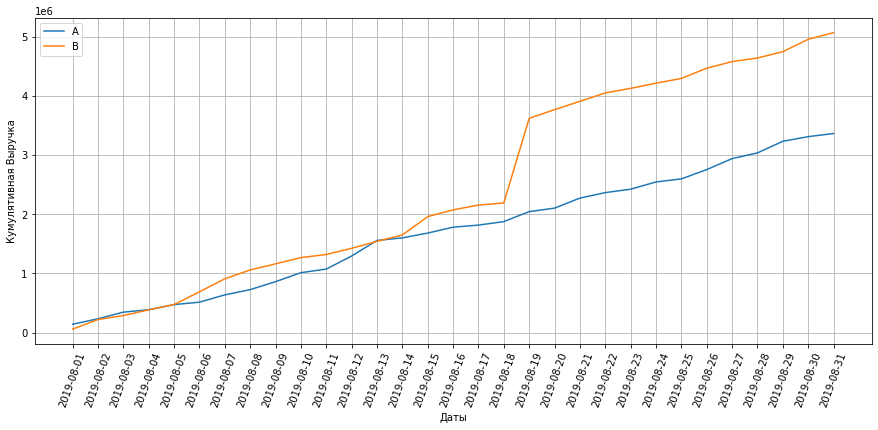

In [14]:
plt.figure(figsize=(15, 6))
plt.plot(cum_sum_a['date'],cum_sum_a['cum_sum'], label='A')
plt.plot(cum_sum_b['date'],cum_sum_b['cum_sum'], label='B')
plt.xticks(cum_sum_b['date'],
       rotation=70)
plt.ylabel("Кумулятивная Выручка")
plt.xlabel("Даты")
plt.grid()
plt.legend()

### выводы

наблюдается линейный рост с резким скачком в середине месяца. скорей всего причины в аномальных заказах.

## Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.


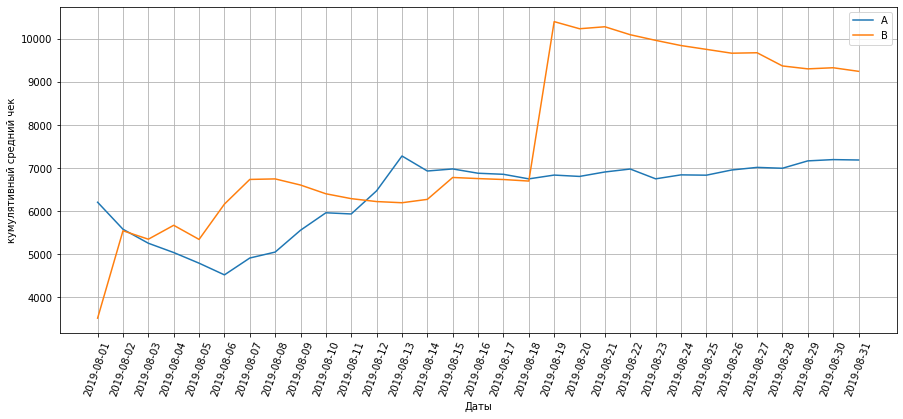

In [15]:
plt.figure(figsize=(15, 6))
plt.plot(cum_sum_a['date'],cum_sum_a['cum_sum']/cum_sum_a['cum_ord'], label='A')
plt.plot(cum_sum_b['date'],cum_sum_b['cum_sum']/cum_sum_b['cum_ord'], label='B')
plt.xticks(cum_sum_b['date'],
       rotation=70)
plt.ylabel("кумулятивный средний чек")
plt.xlabel("Даты")
plt.grid()
plt.legend()

### Вывод
 средний чек закрепился в районе 7к для группы А. резкий подскок в том же месте что и для кумулятивной суммы. надо убирать аномалии. 

р.с можно сразу убирать не понимаю почему мы смотрим на грязные данные

## Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.


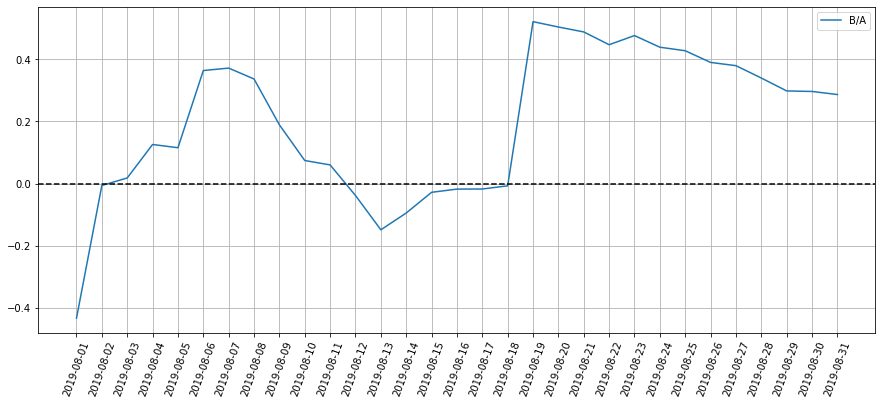

In [16]:
plt.figure(figsize=(15, 6))
plt.plot(cum_sum_a['date'],(cum_sum_b['cum_sum']/cum_sum_b['cum_ord'])/(cum_sum_a['cum_sum']/cum_sum_a['cum_ord'])-1, label='B/A')
plt.axhline(y=0, color='black', linestyle='--') 
plt.xticks(cum_sum_b['date'],
       rotation=70)
plt.grid()
plt.legend()

### Вывод
 аналогичная ситуация с отношением средних чеков. начали выравниваться, но потом был резкий всплеск

## Постройте график кумулятивного среднего количества заказов по группам. Сделайте выводы и предположения.


In [17]:
print(ord_vis_a)
print(ord_vis_b)
cum_sum_a

         date  revenue  orders  user  cum_sum  cum_ord  users  visitors
0  2019-08-01   142779      23    19   142779       23     19       719
1  2019-08-02    91602      19    18   234381       42     37       619
2  2019-08-03   112473      24    24   346854       66     61       507
3  2019-08-04    41176      11    11   388030       77     72       717
4  2019-08-05    86383      22    22   474413       99     94       756
5  2019-08-06    40919      15    12   515332      114    106       667
6  2019-08-07   123248      16    16   638580      130    122       644
7  2019-08-08    88639      14    14   727219      144    136       610
8  2019-08-09   134237      11    11   861456      155    147       617
9  2019-08-10   152275      15    15  1013731      170    162       406
10 2019-08-11    60665      11    11  1074396      181    173       718
11 2019-08-12   220392      19    19  1294788      200    192       595
12 2019-08-13   263638      14    14  1558426      214    206   

,date,revenue,orders,user,cum_sum,cum_ord,users
0,2019-08-01,142779,23,19,142779,23,19
1,2019-08-02,91602,19,18,234381,42,37
2,2019-08-03,112473,24,24,346854,66,61
3,2019-08-04,41176,11,11,388030,77,72
4,2019-08-05,86383,22,22,474413,99,94
5,2019-08-06,40919,15,12,515332,114,106
6,2019-08-07,123248,16,16,638580,130,122
7,2019-08-08,88639,14,14,727219,144,136
8,2019-08-09,134237,11,11,861456,155,147
9,2019-08-10,152275,15,15,1013731,170,162


In [18]:
ord_vis_a['cum_vis'] = ord_vis_a['visitors'].cumsum()
ord_vis_b['cum_vis'] = ord_vis_b['visitors'].cumsum()

15.979779248969361

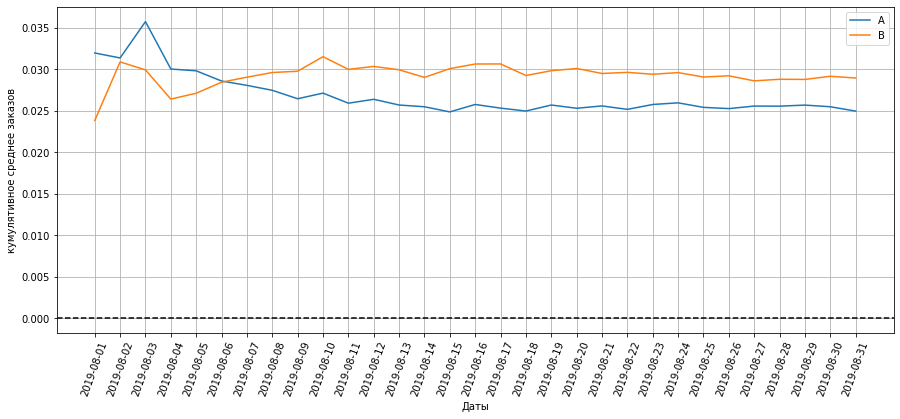

In [19]:
plt.figure(figsize=(15, 6))
plt.plot(ord_vis_a['date'],ord_vis_a['cum_ord']/ord_vis_a['cum_vis'], label='A')
plt.plot(ord_vis_b['date'],ord_vis_b['cum_ord']/ord_vis_b['cum_vis'], label='B')
plt.axhline(y=0.00,color='black',linestyle='--')
plt.xticks(ord_vis_a['date'],
       rotation=70)
plt.ylabel("кумулятивное среднее заказов")
plt.xlabel("Даты")
plt.grid()
plt.legend()
((ord_vis_b['cum_ord'].max()/ord_vis_b['cum_vis'].max())/(ord_vis_a['cum_ord'].max()/ord_vis_a['cum_vis'].max())-1)*100

### Вывод
 
в группе B среднее кол-во заказов больше чем в группу A. Разница наблбдается стабильно после 10 го дня. разница составила 16%

## Постройте график относительного изменения кумулятивного среднего количества заказов группы B к группе A. Сделайте выводы и предположения.


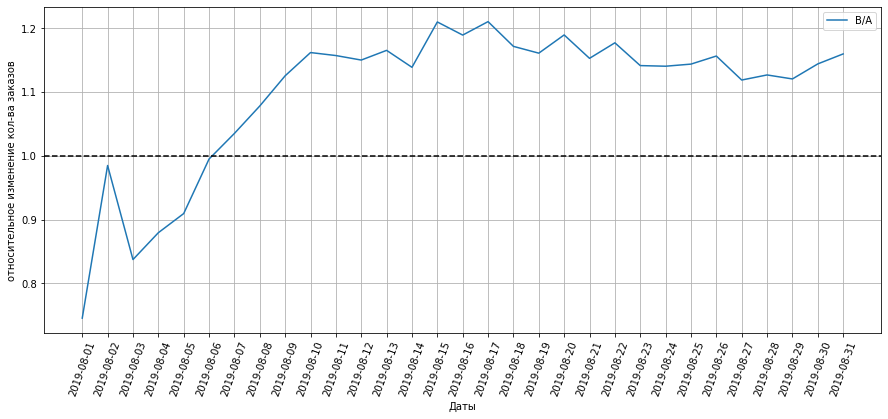

In [20]:
plt.figure(figsize=(15, 6))
plt.plot(ord_vis_a['date'],(ord_vis_b['cum_ord']/ord_vis_b['cum_vis'])/(ord_vis_a['cum_ord']/ord_vis_a['cum_vis']), label='B/А')
plt.axhline(y=1,color='black',linestyle='--')
plt.xticks(ord_vis_a['date'],
       rotation=70)
plt.ylabel("относительное изменение кол-ва заказов")
plt.xlabel("Даты")
plt.grid()
plt.legend()

### Вывод
График отчеливо показывает, что группа В лидирует по среднему кол-ву заказов.

## Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.


In [21]:
users = orders.groupby('visitorId').agg({'revenue':'sum','transactionId':'count'})
users = users.reset_index(level=0)
users = users[np.logical_not(users['visitorId'].isin(uniq_common['visitorId']))]
users.max()

visitorId        4283872382
revenue             1294500
transactionId             3
dtype: int64

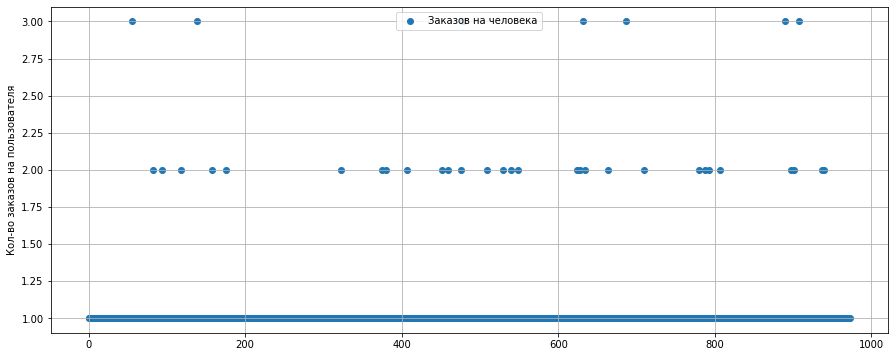

In [22]:
plt.figure(figsize=(15, 6))
x_values = pd.Series(range(len(users['visitorId'])))
plt.scatter(x_values,users['transactionId'], label='Заказов на человека')
plt.ylabel("Кол-во заказов на пользователя")

plt.grid()
plt.legend()


### Вывод
 
редкий пользователь оформляет больше 1 заказа. видимо есть постоянные покупатели и те которые пробуют наш сервис.

## Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.


In [23]:
np.percentile(users['transactionId'],[95,99])

array([1., 2.])

# Вывод
 больше 1 заказов оформили только 5% пользователей. и больше 2 заказов оформил лишь 1%

## Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.


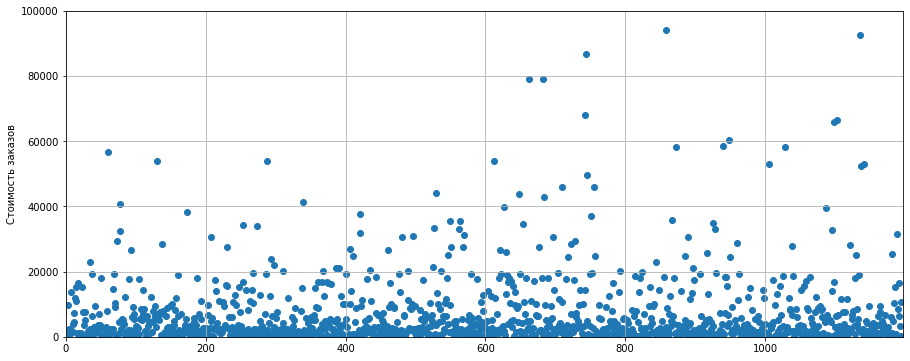

In [24]:
plt.figure(figsize=(15, 6))
x_values = pd.Series(range(len(orders['revenue'])))
plt.scatter(x_values,orders['revenue'])
plt.axis([0, len(orders['revenue']), 0, 100000]) 

plt.ylabel("Стоимость заказов")

plt.grid()


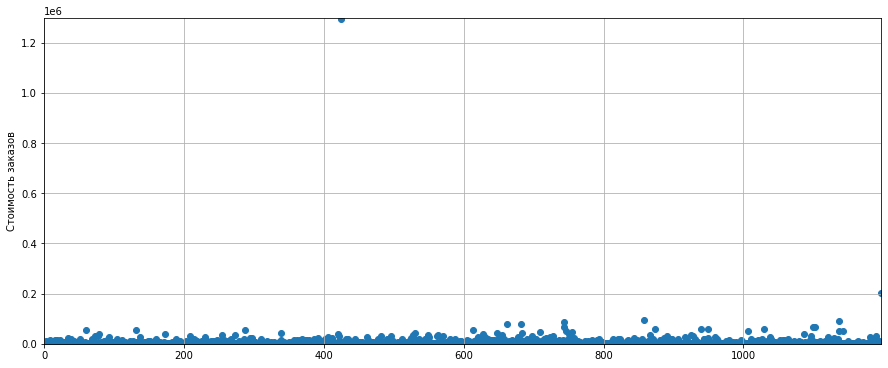

In [25]:
plt.figure(figsize=(15, 6))
x_values = pd.Series(range(len(orders['revenue'])))
plt.scatter(x_values,orders['revenue'])
plt.axis([0, len(orders['revenue']), 0, 1300000]) 
plt.ylabel("Стоимость заказов")
plt.grid()


### Вывод
редкие заказы превышают 20к, встречаются совсем аномальные миллонные заказы.(вот и поймали мы скачок)

## Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.


In [26]:
np.percentile(orders['revenue'],[95,99])

array([28000. , 58233.2])

### Вывод
 5% пользователей делали заказы дороже 28к и 1% дороже 58к

## Посчитайте статистическую значимость различий в среднем количестве заказов между группами по «сырым» данным. Сделайте выводы и предположения.


- Нулевая гипотеза: - различий между группами нет
    
- Альтернативная - различия между группами  есть

In [27]:
'''row_orders_a['orders'] = cum_sum_a['cum_ord']/cum_sum_a['users']
row_orders_b = cum_sum_b['cum_ord']/cum_sum_b['users']'''

users_a = data_a.groupby('visitorId').agg({'revenue':'sum','transactionId':'count'})
users_b = data_b.groupby('visitorId').agg({'revenue':'sum','transactionId':'count'})

users_a = users_a.reset_index(level=0)
users_b = users_b.reset_index(level=0)
v_a =  pd.concat([users_a['transactionId'],pd.Series(0, index=np.arange(visitors[visitors['group']=='A']['visitors'].sum() - len(users_a['transactionId'])), name='orders')],axis=0)
v_b =  pd.concat([users_b['transactionId'],pd.Series(0, index=np.arange(visitors[visitors['group']=='B']['visitors'].sum() - len(users_b['transactionId'])), name='orders')],axis=0)


print("{0:.3f}".format(st.mannwhitneyu(v_a,v_b)[1]))

print("{0:.3f}".format(v_b.mean() / v_a.mean() - 1))

0.011
0.160


### Вывод
По «сырым» данным различий в среднем числе заказов групп A и B есть. p-value меньше 0,05. поэтому можем отвергать 0 гипотезу.

## Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.


- Нулевая гипотеза: - различий между группами нет
    
- Альтернативная - различия между группами  есть

In [28]:
users_a

,visitorId,revenue,transactionId
0,11685486,6201,1
1,54447517,130,1
2,66685450,7990,1
3,78758296,1044,1
4,85103373,1220,1
5,87885904,300,1
6,109615108,2190,1
7,130417038,1530,1
8,132143192,750,1
9,138252163,4580,1


In [29]:

o_a =  avg_a['revenue']
o_b =  avg_b['revenue']
print("{0:.3f}".format(st.mannwhitneyu(o_a,o_b)[1]))
print("{0:.3f}".format((o_b.mean() / o_a.mean()) - 1))

0.829
0.287


### Вывод
 P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Впрочем, средний чек группы B значительно выше среднего чека группы A.

## Посчитайте статистическую значимость различий в среднем количестве заказов между группами по «очищенным» данным. Сделайте выводы и предположения.


In [30]:
data_a = data_a[data_a['revenue']<28001]
data_b = data_b[data_b['revenue']<28001]

users_a = data_a.groupby('visitorId').agg({'revenue':'sum','transactionId':'count'})
users_b = data_b.groupby('visitorId').agg({'revenue':'sum','transactionId':'count'})

users_a = users_a[users_a['transactionId']<2]
users_b = users_b[users_b['transactionId']<2]

users_a = users_a.reset_index(level=0)
users_b = users_b.reset_index(level=0)
v_a =  pd.concat([users_a['transactionId'],pd.Series(0, index=np.arange(visitors[visitors['group']=='A']['visitors'].sum() - len(users_a['transactionId'])), name='orders')],axis=0)
v_b =  pd.concat([users_b['transactionId'],pd.Series(0, index=np.arange(visitors[visitors['group']=='B']['visitors'].sum() - len(users_b['transactionId'])), name='orders')],axis=0)


print("{0:.3f}".format(st.mannwhitneyu(v_a,v_b)[1]))

print("{0:.3f}".format(v_a.mean() / v_b.mean() - 1))

0.014
-0.151


### Вывод
 : По «чистым» данным различий в среднем числе заказов групп A и B есть и после очистки не стала драматичней . p-value меньше 0,05. поэтому можем отвергать 0 гипотезу.

## Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

In [31]:
data_a = data_a[data_a['visitorId'].isin(users_a['visitorId'])]
data_b = data_b[data_b['visitorId'].isin(users_b['visitorId'])]
o_a =  data_a['revenue']
o_b =  data_b['revenue']
print("{0:.3f}".format(st.mannwhitneyu(o_a,o_b)[1]))
print("{0:.3f}".format(o_b.mean() / o_a.mean() - 1))


0.805
-0.013


### Вывод:
 По «чистым» данным различий в среднем числе заказов групп A и B нет и после очистки разница чусть скоректирвалсь . p-value больше 0,05. поэтому  не можем отвергать 0 гипотезу.

In [32]:
v_aa['con'] = v_aa['user']/v_aa['visitors']*100

v_bb['con'] = v_bb['user']/v_bb['visitors']*100


19.0


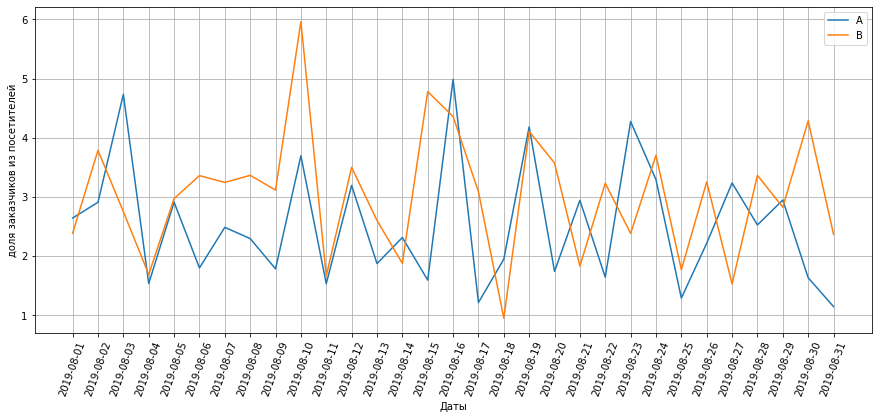

In [33]:
plt.figure(figsize=(15, 6))
plt.plot(v_aa['date'],v_aa['con'],label='A')
plt.plot(v_bb['date'],v_bb['con'],label='B')
print((v_bb['con'].mean()/v_aa['con'].mean()-1)//0.01)
plt.xticks(ord_vis_a['date'],
       rotation=70)
plt.ylabel("доля заказчиков из посетителей")
plt.xlabel("Даты")
plt.grid()
plt.legend()

In [34]:
print(len(aa))
print(len(bb))

print(sum(visitors[visitors['group']=='A']['visitors']))
print(sum(visitors[visitors['group']=='B']['visitors']))


468
548
18736
18916


## Выводы по Части 2

Я выбираю прекратить тест, так как согалсано статистической выкладке видна разница в кол-ве заказов между группами. хоть и средний чек и среднее кол-во заказов на человека не поменялось драмматически. мы можем сказать что выросло общее их колличество. теперь стоит оценить рентабельность приведенных пользователей.Выросло ли САС. Однако, предварительные результаты меня порадовали. Также средняя конверсия лучше на 20% в группе В. И статистическая проверка показа различие долей.